# PROJET DE MACHINE LEARNING 
# THEME : Prédiction de la qualité du vin rouge
# REDACTEUR: KLAVER RIOPEL

# CONTEXTE 
#Les données que nous avons reçu décrivent diverses caractéristiques du vin rouge, ainsi que
sa qualité. On souhaite construire un prédicteur de la qualité du vin rouge à partir des
caractéristuques en questions. On suppose qu'il n'y a pas une hiérarchie sur les modalités
de la variable à expliquer.

# importation des utiles necessaires 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
import numpy as np
import imp

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import matplotlib.colors as colors
import matplotlib.cm as cmx
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV

from scipy.stats import uniform
from scipy.stats import norm
import encodings


# 1. importation des donnees et traitements des donnees manquantes 

In [6]:
df_red = pd.read_csv('C:/Users/klaverriopel1/Downloads/winequality-red.csv', sep=',')

In [49]:
df_red.isnull().sum().sum()

0

#nous observons que l'on a pas de donnees maquantes 

In [7]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df_red.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# 2 Analyse descriptive Uni-Varié

In [9]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
red=df_red

In [11]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [12]:
print(red.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

# Distribution des notes des vins

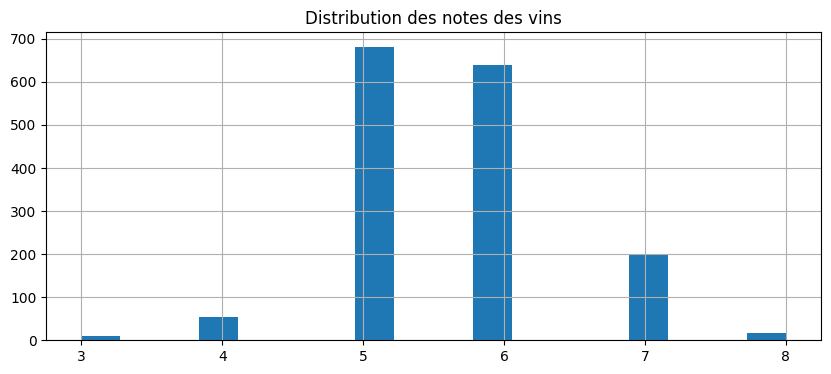

In [13]:
import matplotlib.pyplot as plt
plt.close('all')
#plt.style.use('ggplot')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
red.quality.hist(bins=18, ax=ax)
plt.title('Distribution des notes des vins')
plt.show()

Les vins avec une note de 3 et 9 sont peu représentés avec seulement 5-10 echantillions, ce qui risque de poser un peu de problème de sur apprentissage.



# Découpage des jeux de données training et Testing  
Nous allons d’abord diviser les données en deux. 80% de des données iront dans la partie training pour entrainer le modèle et les 20% restants des données iront dans la partie test pour la validation du modèle.

## Séparons maintenant le jeu de données en tant que variable de réponse et variables de caractéristiques

In [26]:

X = red.drop(['quality'], axis = 1)
y = red['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# 3.a Application des methode de machine learning
## 1 Regression logistque

In [27]:
#regression logistque
lr = LogisticRegression()
lr.fit(X_train, y_train)

D:\WPy64-31090\python-3.10.9.amd64\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
pred_lr = lr.predict(X_test)
#Let's see how our model performed
print(classification_report(y_test, pred_lr))
print ("Overall Accuracy:", round(metrics.accuracy_score(y_test, pred_lr), 3))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.10      0.18        10
           5       0.61      0.76      0.68       130
           6       0.54      0.57      0.56       132
           7       0.40      0.19      0.26        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.43      0.27      0.28       320
weighted avg       0.56      0.57      0.55       320

Overall Accuracy: 0.572


D:\WPy64-31090\python-3.10.9.amd64\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\WPy64-31090\python-3.10.9.amd64\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\WPy64-31090\python-3.10.9.amd64\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Overall Accuracy pour la regression logistiaue: 0.572

In [30]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))
print ("Overall Accuracy:", round(metrics.accuracy_score(y_test, pred_svc), 3))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.65      0.75      0.70       130
           6       0.55      0.64      0.59       132
           7       0.56      0.21      0.31        42
           8       0.00      0.00      0.00         5

    accuracy                           0.60       320
   macro avg       0.29      0.27      0.27       320
weighted avg       0.56      0.60      0.57       320

Overall Accuracy: 0.597


D:\WPy64-31090\python-3.10.9.amd64\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\WPy64-31090\python-3.10.9.amd64\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\WPy64-31090\python-3.10.9.amd64\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2 régresseur des k- plus proches voisins

In [28]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [31]:
pred_knn = svc.predict(X_test)

In [32]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.65      0.75      0.70       130
           6       0.55      0.64      0.59       132
           7       0.56      0.21      0.31        42
           8       0.00      0.00      0.00         5

    accuracy                           0.60       320
   macro avg       0.29      0.27      0.27       320
weighted avg       0.56      0.60      0.57       320



D:\WPy64-31090\python-3.10.9.amd64\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\WPy64-31090\python-3.10.9.amd64\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\WPy64-31090\python-3.10.9.amd64\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
print ("Overall Accuracy:", round(metrics.accuracy_score(y_test, pred_knn), 3))

Overall Accuracy: 0.597


## Overall Accuracy: 0.597
##  3 regression lineaire

In [42]:
from sklearn.linear_model import LinearRegression
rg=LinearRegression()
rg.fit(X_train, y_train)

LinearRegression()

In [46]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
pred_rg = rg.predict(X_test)
r2 = r2_score(y_test, pred_rg)

print("R2 score:", r2)
print("Overall Accuracy:",format(round(r2,2)))

R2 score: 0.40201256371442895
Overall Accuracy: 0.4


## Overall Accuracy: 0.4

## 4 l'arbre binaire de régression

In [48]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(criterion = "squared_error", max_depth = 10, min_samples_split=100, random_state=56)
reg.fit(X_train, y_train)
predr = reg.predict(X_test)
r2 = r2_score(y_test, predr)

print("R2 score:", r2)
print("Overall Accuracy:",format(round(r2,2)))

R2 score: 0.3253223771512178
Overall Accuracy: 0.33


## Overall Accuracy: 0.33

# Determination de la  meilleur methode

nous avons donc observer que parmi les methides de machine learning appliques
nous observons que la methode possedant la meilleur precision la methode des regresseurs des k-plus proche voisisns avec une Overall accuraty de 0.597

# 3.b Evaluation des caracterisques les plus pertinantes dans l evaluation de la qualite du vin

Nous examiner les caractéristiques des variables et surtout les relations entre ces variables. Pour cela on utilise une méthode d”analyse factorielle pour mettre en évidence des relations entre les variables quantitatives (mesures physico-chimique) et la variable quantitative illustrative “quality”.

Nous allons lancer une analyse en composante principale (ACP) pour représenter un ensemble de points dans un espace de dimension.

# Analyse en composante principale ACP

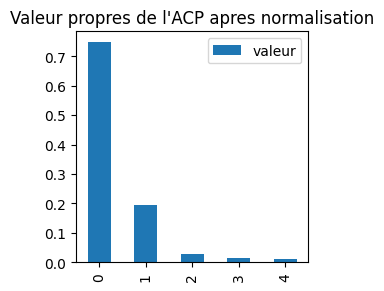

In [55]:
X = red.drop(['quality'],axis=1)
pca = PCA(n_components=5)
Xn = normalize(X)
pca.fit(Xn)
PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,svd_solver='auto', tol=0.0, whiten=False)
eig = pd.DataFrame(dict(valeur=pca.explained_variance_ratio_))
ax = eig.plot(kind='bar', figsize=(3,3))
ax.set_title("Valeur propres de l'ACP apres normalisation");
plt.show()

In [56]:
v2 = pd.DataFrame(pca.components_[0:2,:]).T
v2.index = red.columns[:-1]
v2.columns = ['v1', 'v2']

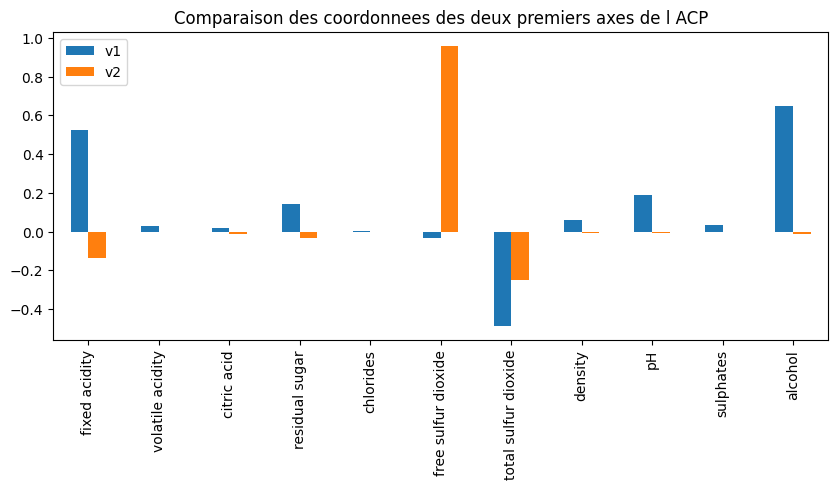

In [57]:
ax = v2.plot(y=['v1', 'v2'], kind='bar', figsize=(10,4))
ax.legend(loc='upper left')
ax.set_title("Comparaison des coordonnees des deux premiers axes de l ACP")


plt.show()


On remarque que l’alcool, l’acidité, le dioxyde, le pH semble jouer un rôle plus grand que les autres variables
